<a href="https://colab.research.google.com/github/rajeshwarivpatil/Cat-Dog-classifier/blob/main/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [ ]:
import os
import zipfile
import tensorflow as tf

# Download the dataset zip
zip_path = tf.keras.utils.get_file(
    'cats_and_dogs_filtered.zip',
    origin='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
    extract=False
)

# Extract the zip manually
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(zip_path))

# Define the correct paths
base_dir = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

print("Sample training images:")
print("Cats:", len(os.listdir(train_cats_dir)))
print("Dogs:", len(os.listdir(train_dogs_dir)))


Sample training images:
Cats: 1000
Dogs: 1000


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Prepare the image data using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Step 2: Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=50
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 83s 815ms/step - accuracy: 0.5074 - loss: 0.7011 - val_accuracy: 0.6080 - val_loss: 0.6518
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 803ms/step - accuracy: 0.6039 - loss: 0.6548 - val_accuracy: 0.6360 - val_loss: 0.6373
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 80s 799ms/step - accuracy: 0.6952 - loss: 0.5848 - val_accuracy: 0.6960 - val_loss: 0.5777
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 844ms/step - accuracy: 0.7425 - loss: 0.5109 - val_accuracy: 0.7300 - val_loss: 0.5888
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 144s 863ms/step - accuracy: 0.7576 - loss: 0.4872 - val_accuracy: 0.6860 - val_loss: 0.6412


In [ ]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# Upload an image
uploaded = files.upload()

# Load and preprocess the image
for fn in uploaded.keys():
    img = load_img(fn, target_size=(150, 150))  # Resize image
    img_array = img_to_array(img) / 255.0       # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)

    if prediction[0][0] > 0.5:
        print(f"🦴 This looks like a **dog**! (Confidence: {prediction[0][0]:.2f})")
    else:
        print(f"😺 This looks like a **cat**! (Confidence: {1 - prediction[0][0]:.2f})")


Saving pexels-chevanon-photography-1108099.jpg to pexels-chevanon-photography-1108099.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
🦴 This looks like a **dog**! (Confidence: 0.90)


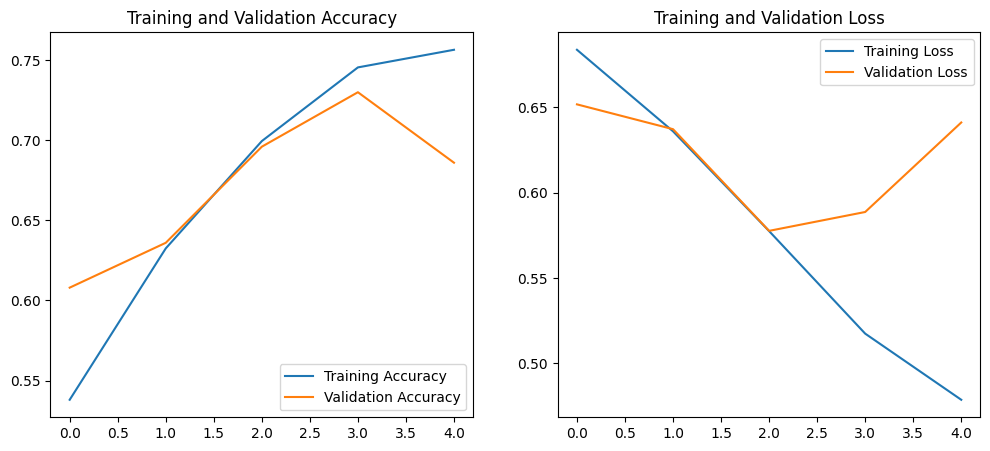

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model.save("cat_dog_classifier_model.h5")


In [ ]:
from google.colab import files
model.save("cat_dog_classifier_model.h5")
files.download("cat_dog_classifier_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>